# Importing the Libraries and Loading the dataset

In [1]:
# Importing the necessary files
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
# Reading the data
data = pd.read_csv("Housing.csv")
data.sample(10)

,house_price,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,Unnamed: 14,Unnamed: 15,Unnamed: 16
460,3087.0,3087000,8100,2,1,1,yes,no,no,no,no,1,no,unfurnished,NaN,NaN,NaN
18,8890.0,8890000,4600,3,2,2,yes,yes,no,no,yes,2,no,furnished,NaN,NaN,NaN
93,6300.0,6300000,7200,3,2,1,yes,no,yes,no,yes,3,no,semi-furnished,NaN,NaN,NaN
82,6615.0,6615000,10500,3,2,1,yes,no,yes,no,yes,1,yes,furnished,NaN,NaN,NaN
90,6440.0,6440000,5000,3,1,2,yes,no,no,no,yes,0,no,semi-furnished,NaN,NaN,NaN
297,4200.0,4200000,3640,3,2,2,yes,no,yes,no,no,0,no,unfurnished,NaN,NaN,NaN
483,2940.0,2940000,6615,3,1,2,yes,no,no,no,no,0,no,semi-furnished,NaN,NaN,NaN
493,2800.0,2800000,3960,3,1,1,yes,no,no,no,no,0,no,furnished,NaN,NaN,NaN
117,5950.0,5950000,3700,4,1,2,yes,yes,no,no,yes,0,no,furnished,NaN,NaN,NaN
272,4340.0,4340000,4075,3,1,1,yes,yes,yes,no,no,2,no,semi-furnished,NaN,NaN,NaN


In [3]:
cols = ['house_price','bathrooms']
test = data[cols]
test.head()

,house_price,bathrooms
0,13300.0,2
1,12250.0,4
2,12250.0,2
3,12215.0,2
4,11410.0,1


<AxesSubplot:>

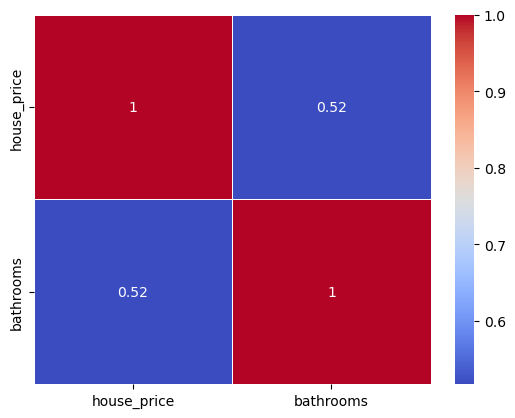

In [4]:
corr = test.corr()
sns.heatmap(corr,annot=True,cmap='coolwarm',linewidths=0.5)

In [5]:
# We check for null values 
data.isna().sum()

house_price           0
price                 0
area                  0
bedrooms              0
bathrooms             0
stories               0
mainroad              0
guestroom             0
basement              0
hotwaterheating       0
airconditioning       0
parking               0
prefarea              0
furnishingstatus      0
Unnamed: 14         545
Unnamed: 15         545
Unnamed: 16         544
dtype: int64

In [6]:
# drop the null values
new_df = data.dropna(axis=1)
new_df

,house_price,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300.00,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250.00,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250.00,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215.00,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410.00,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820.00,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767.15,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750.00,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750.00,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [7]:
category = ['house_price','mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea']
category_data = new_df[category]
category_data.head()

,house_price,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea
0,13300.0,yes,no,no,no,yes,yes
1,12250.0,yes,no,no,no,yes,no
2,12250.0,yes,no,yes,no,no,yes
3,12215.0,yes,no,yes,no,yes,yes
4,11410.0,yes,yes,yes,no,yes,no


In [8]:
col = ['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea']
cat_dummies = pd.get_dummies(category_data,col)
cat_dummies

,house_price,mainroad_no,mainroad_yes,guestroom_no,guestroom_yes,basement_no,basement_yes,hotwaterheating_no,hotwaterheating_yes,airconditioning_no,airconditioning_yes,prefarea_no,prefarea_yes
0,13300.00,False,True,True,False,True,False,True,False,False,True,False,True
1,12250.00,False,True,True,False,True,False,True,False,False,True,True,False
2,12250.00,False,True,True,False,False,True,True,False,True,False,False,True
3,12215.00,False,True,True,False,False,True,True,False,False,True,False,True
4,11410.00,False,True,False,True,False,True,True,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820.00,False,True,True,False,False,True,True,False,True,False,True,False
541,1767.15,True,False,True,False,True,False,True,False,True,False,True,False
542,1750.00,False,True,True,False,True,False,True,False,True,False,True,False
543,1750.00,True,False,True,False,True,False,True,False,True,False,True,False


<AxesSubplot:>

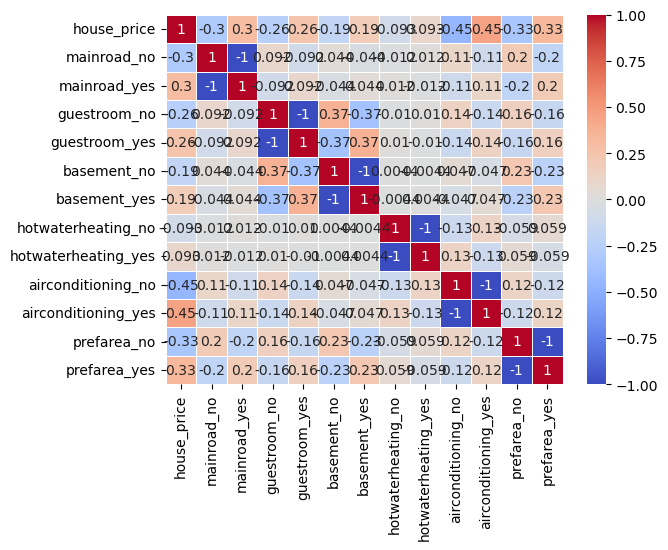

In [9]:
corr = cat_dummies.corr()
sns.heatmap(corr,annot=True,cmap='coolwarm',linewidths=0.5)

# Creating the Dataset with the Desired Columns

In [10]:
# creating a new dataset with the features that we need
new_colums = ['house_price','bedrooms','bathrooms','parking','stories','area']
df = data[new_colums]
df.head()

,house_price,bedrooms,bathrooms,parking,stories,area
0,13300.0,4,2,2,3,7420
1,12250.0,4,4,3,4,8960
2,12250.0,3,2,2,2,9960
3,12215.0,4,2,3,2,7500
4,11410.0,4,1,2,2,7420


# Data Pre-Processing on the newly created Dataset

In [12]:
# Checking null values from our new dataset
df.isna().sum()

house_price    0
bedrooms       0
bathrooms      0
parking        0
stories        0
area           0
dtype: int64

In [13]:
# Checking the data types of our columns
df.dtypes

house_price    float64
bedrooms         int64
bathrooms        int64
parking          int64
stories          int64
area             int64
dtype: object

In [14]:
# Checking the shape of our dataset
df.shape

(545, 6)

In [15]:
# Checking for duplicates in our dataset
df.duplicated().sum()

1

In [16]:
# Viewing the duplicated values
duplicates = df[df.duplicated()]
duplicates

,house_price,bedrooms,bathrooms,parking,stories,area
367,3675.0,2,1,0,1,3630


In [17]:
# Droping the duplicates
new_df = df.drop_duplicates()
new_df.head()

,house_price,bedrooms,bathrooms,parking,stories,area
0,13300.0,4,2,2,3,7420
1,12250.0,4,4,3,4,8960
2,12250.0,3,2,2,2,9960
3,12215.0,4,2,3,2,7500
4,11410.0,4,1,2,2,7420


In [18]:
# Confirming whether there are duplicates
check_duplicates = new_df[new_df.duplicated()]
check_duplicates

,house_price,bedrooms,bathrooms,parking,stories,area


<AxesSubplot:xlabel='house_price', ylabel='Count'>

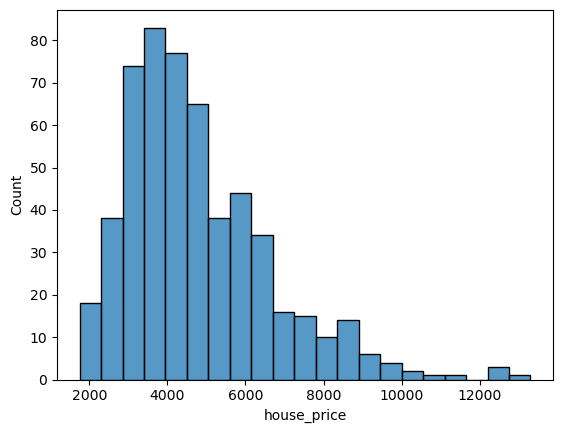

In [19]:
# Checking whether we have outliers in our dataset by ploting a histogram
sns.histplot(new_df['house_price'])

array([[<AxesSubplot:title={'center':'house_price'}>,
        <AxesSubplot:title={'center':'bedrooms'}>],
       [<AxesSubplot:title={'center':'bathrooms'}>,
        <AxesSubplot:title={'center':'parking'}>],
       [<AxesSubplot:title={'center':'stories'}>,
        <AxesSubplot:title={'center':'area'}>]], dtype=object)

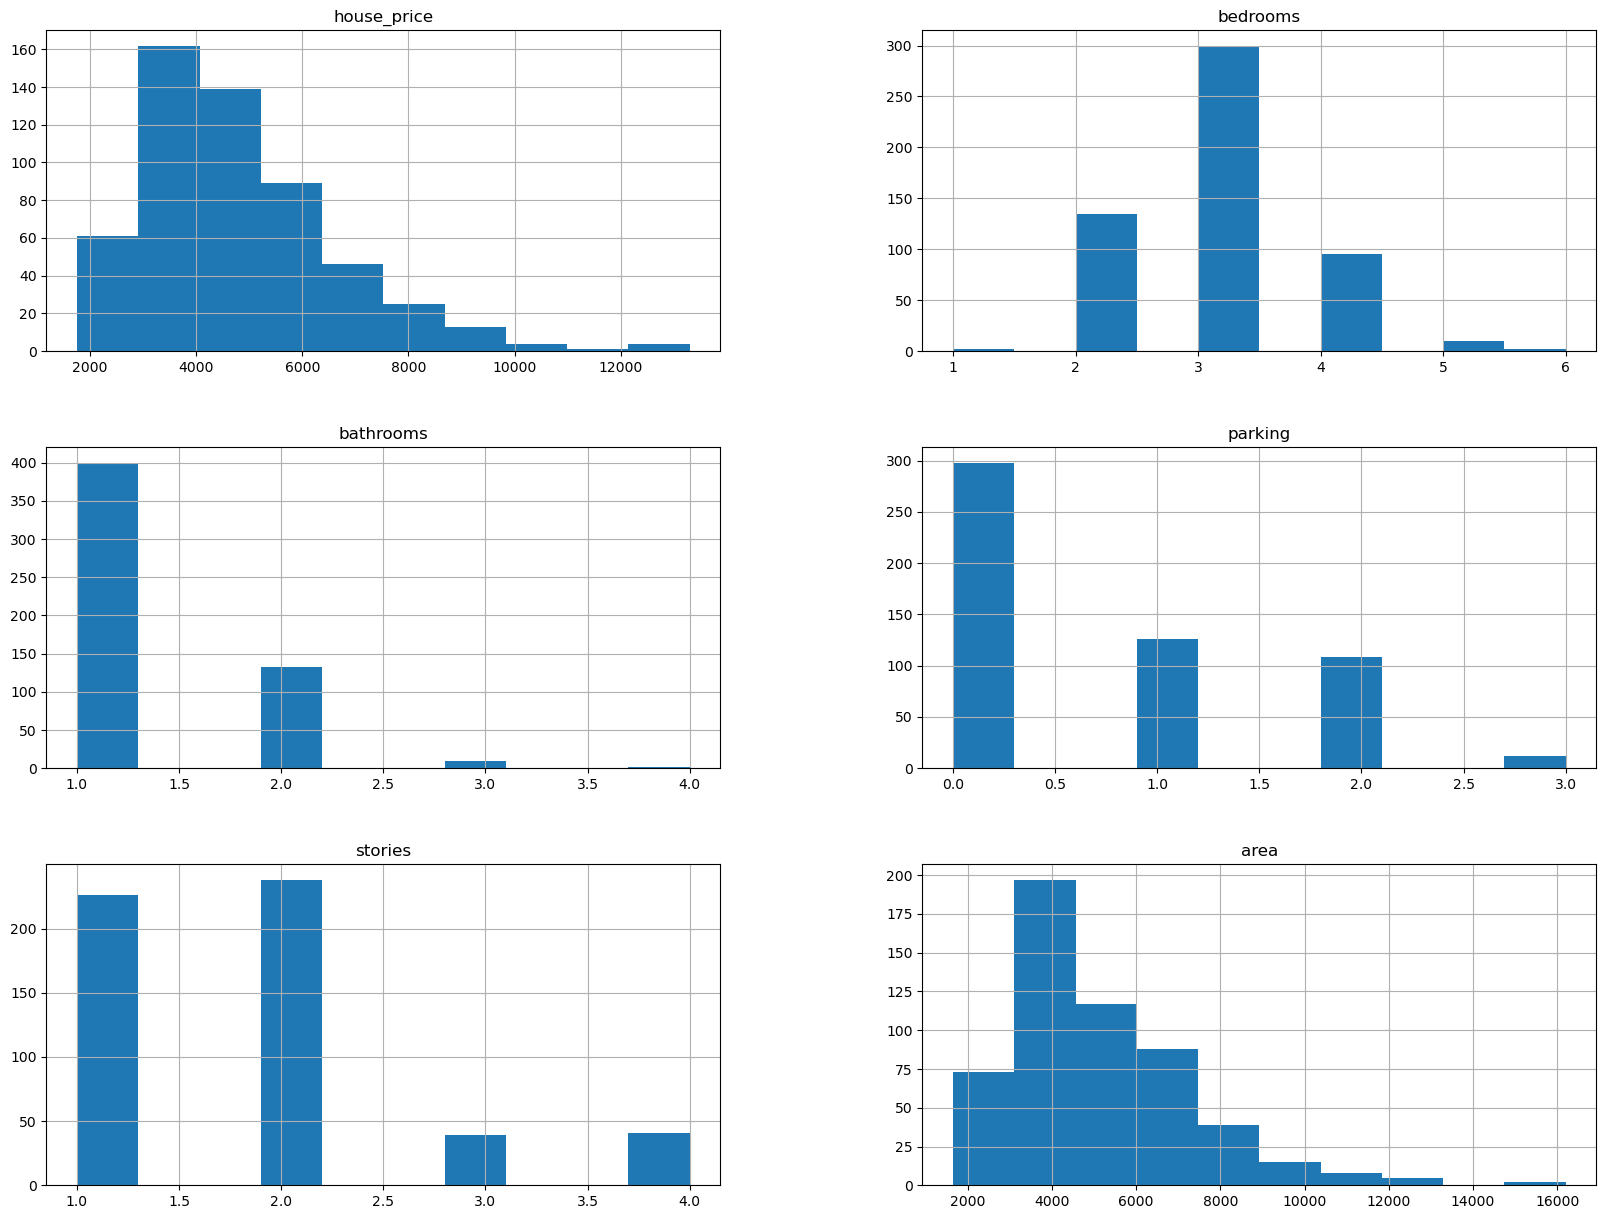

In [20]:
# Checking for the other coluns
new_df.hist(bins=10,figsize=(20,15))

<AxesSubplot:>

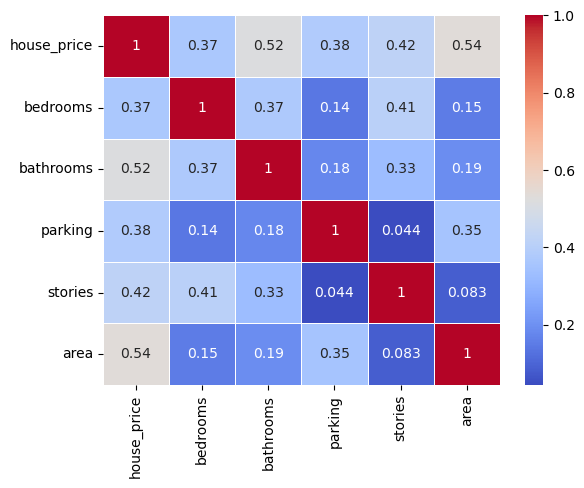

In [21]:
# Finding the correlation of the data

# Calculating the correlation matrix
corr_matrix = new_df.corr()

# Drawing a heatmap
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm',linewidths=0.5)


# Spliting the data, Training and Testing the Model

In [22]:
# Importing the libraries
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score

In [23]:
# Spliting the data into target and features
x = new_df.drop('house_price',axis=1)
y = new_df['house_price']

print("Data splitted successfully")

Data splitted successfully


In [24]:
# Spliting the data into training and testing sets
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

print("Data Splitted well")

Data Splitted well


In [25]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [26]:
# Using LinearRegression Model
model = LinearRegression()

# Train the model
model.fit(x_train,y_train)

# Printing the score of the model
print(model.score(x_test,y_test))

0.5336469797647974


In [27]:
# Saving the model
import pickle
saved_model = pickle.dump(model,open("Linear_regression_model.pkl","wb"))

print("model saved successfully")

model saved successfully


In [28]:
# Using RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(x_train, y_train)
print(model.score(x_test, y_test))

0.45056131115955445


In [29]:
# Using xgboost
import xgboost as xgb
model = xgb.XGBRegressor()
model.fit(x_train, y_train)
print(model.score(x_test, y_test))

0.34681240992227924
